<a href="https://colab.research.google.com/github/lakshmirnair/problem-solving-in-python/blob/master/problem-solving-in-python/ML_algorithm/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. SVM regression with numeric data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Support-Vector-Regression-Data.csv")
x=df.x.values.reshape(-1,1)
y=df.y.values.reshape(-1,1)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4,random_state=42)

In [ ]:
sv=SVR()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)

1.8299539787308559


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2. SVM on Earthquake Data

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshmicse","key":"9fef5e28235ca1cb1ae73973670f2c87"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
#change the permission
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d nksingh673/sample-earthquake-data

  0% 0.00/68.0k [00:00<?, ?B/s]
100% 68.0k/68.0k [00:00<00:00, 67.4MB/s]


In [6]:
#unzip the file 
from zipfile import ZipFile
f_name="sample-earthquake-data.zip"
with ZipFile(f_name,'r') as zip:
  zip.extractall()
  print("DONE")

DONE


In [8]:
import matplotlib.pyplot as plt
#Seaborn is a library for making statistical graphics in Python. 
#It builds on top of matplotlib and integrates closely with pandas data structures.
import seaborn as sn
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd

eq = pd.read_csv("/content/oneyear.csv")


In [9]:
eq.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1369.000000,1369.000000,1369.000000,1369.000000,0.0,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1368.000000,1368.000000
mean,-1.117302,119.207969,102.069072,4.496275,NaN,100.971512,2.326909,0.852768,8.227684,6.678305,0.121450,30.986111
std,5.605702,10.028394,129.415379,0.377192,NaN,44.781584,2.286374,0.260124,2.622920,3.829167,0.050303,30.446167
min,-11.762200,95.113500,4.000000,3.900000,NaN,13.000000,0.008000,0.130000,2.400000,0.600000,0.034000,1.000000
25%,-7.026200,112.938000,24.610000,4.200000,NaN,71.000000,1.310000,0.670000,6.500000,3.600000,0.085000,13.000000
50%,0.268400,123.957300,53.860000,4.400000,NaN,95.000000,2.063000,0.830000,7.900000,7.000000,0.116000,20.000000
75%,3.541300,126.788100,121.110000,4.600000,NaN,128.000000,2.928000,1.030000,9.500000,8.900000,0.148000,37.000000
max,9.268100,128.317100,621.700000,6.900000,NaN,324.000000,56.265000,1.640000,29.300000,33.700000,0.532000,269.000000


In [10]:
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-02-10T05:12:35.460Z,5.1033,125.3179,44.32,4.3,mb,NaN,131,1.970,0.70,us,us2000d062,2018-02-10T09:03:34.040Z,"36km SSW of Sarangani, Philippines",earthquake,5.0,9.3,0.126,18.0,reviewed,us,us
1,2018-02-10T00:31:19.880Z,-8.8535,117.1527,116.88,4.9,mb,NaN,59,2.991,1.06,us,us2000d00q,2018-02-10T03:42:15.567Z,"32km SSW of Batudulang, Indonesia",earthquake,6.5,7.3,0.091,38.0,reviewed,us,us
2,2018-02-08T09:52:47.330Z,4.7512,96.2239,10.00,5.3,mww,NaN,148,0.862,1.29,us,us2000cyrm,2018-02-09T02:47:40.084Z,"51km S of Reuleuet, Indonesia",earthquake,6.6,1.8,0.073,18.0,reviewed,us,us
3,2018-02-07T22:28:37.900Z,-10.1202,118.7274,10.00,4.5,mb,NaN,86,3.764,0.95,us,us2000cygt,2018-02-07T22:54:23.040Z,"61km SW of Panenggoede, Indonesia",earthquake,7.6,1.9,0.084,42.0,reviewed,us,us
4,2018-02-07T20:22:57.530Z,1.4361,127.0142,120.78,4.5,mb,NaN,105,0.748,0.76,us,us2000cydt,2018-02-07T21:26:37.040Z,"82km NNW of Kota Ternate, Indonesia",earthquake,8.0,6.6,0.089,37.0,reviewed,us,us


In [11]:
#‘all’ : If all values are NA, drop that row or column.
#Keep the DataFrame with valid entries in the same variable- True
eq.dropna(how='all',axis=1,inplace=True)

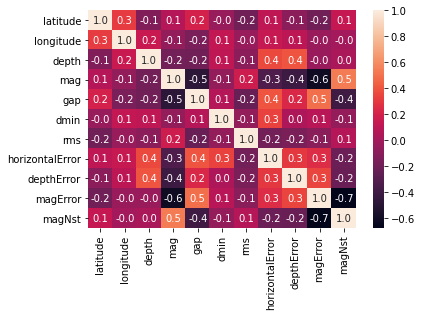

In [13]:
f= plt.plot(figsize=(21,21))
sn.heatmap(eq.corr(),annot=True,fmt='.1f',color='green') 

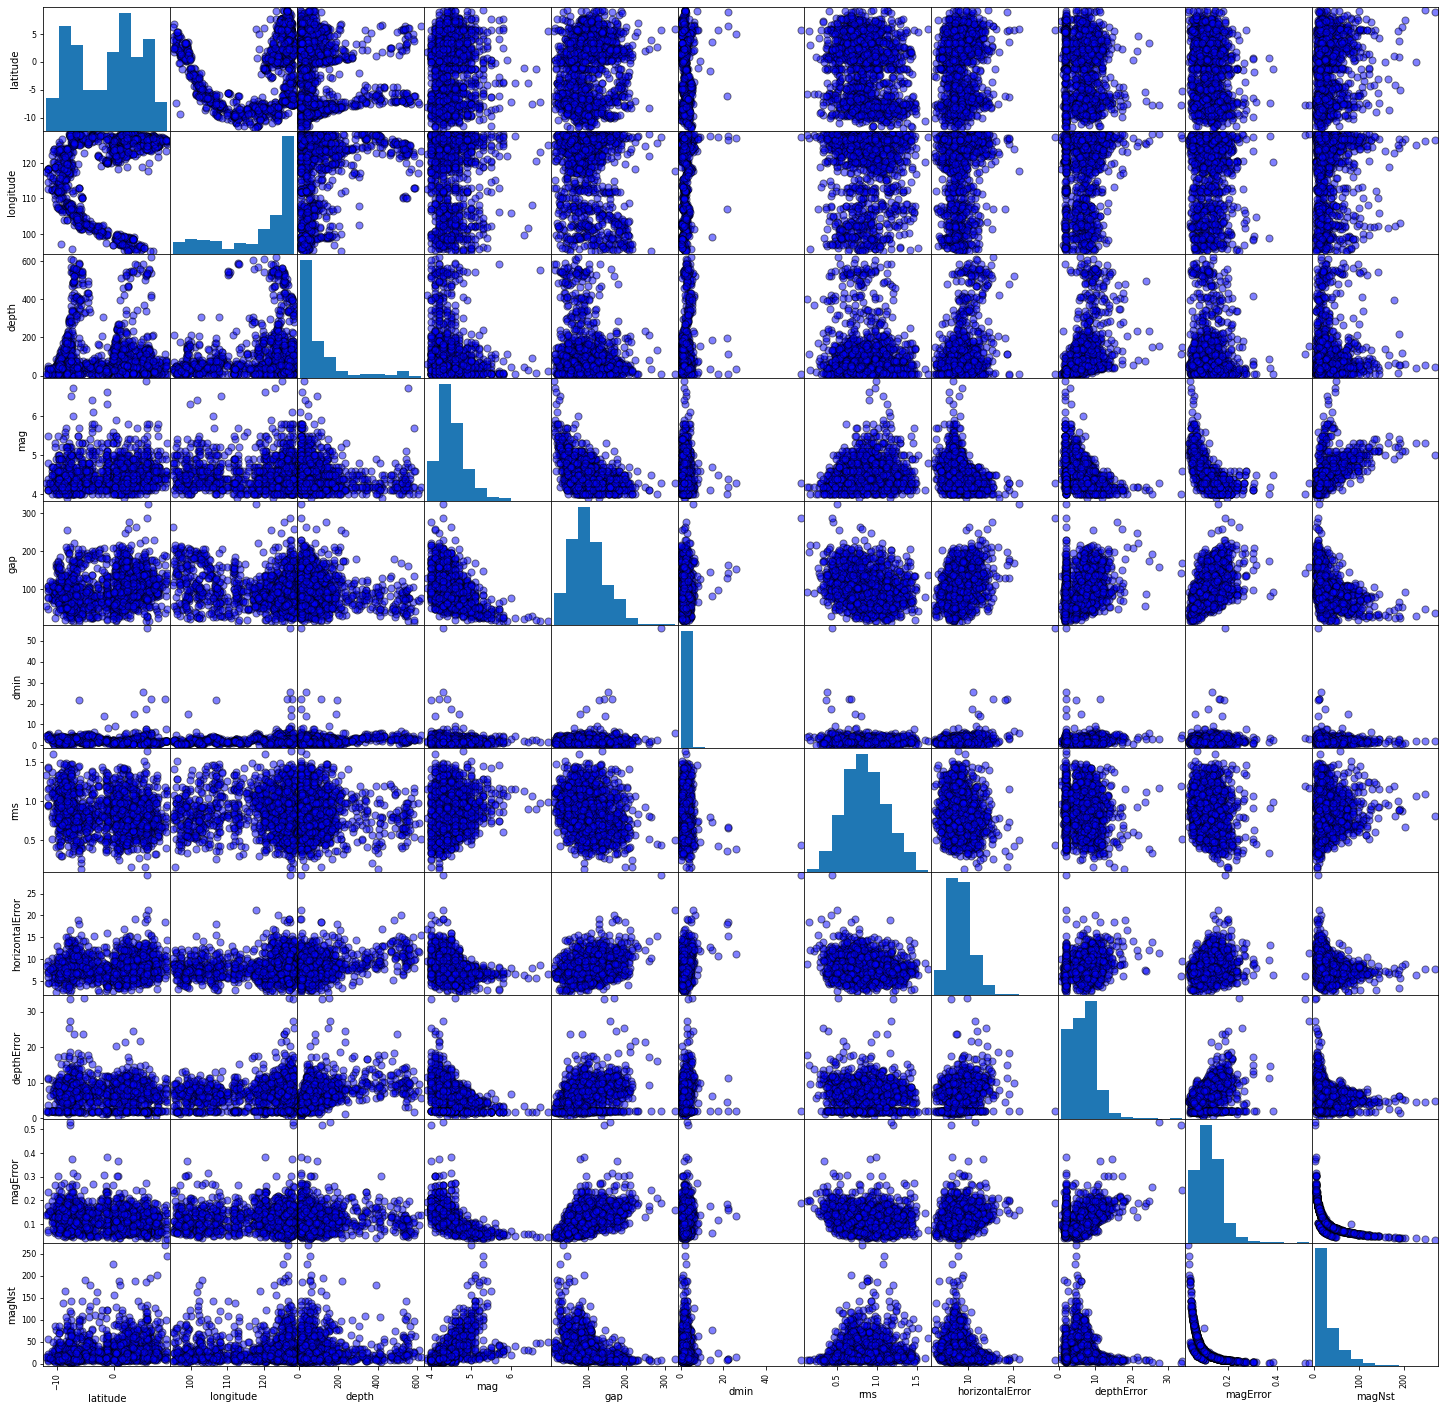

In [19]:
pd.plotting.scatter_matrix(eq.loc[0:,eq.columns],c=['blue'],alpha=0.5,
                           figsize=[25,25],diagonal='hist',s=200,marker='.',edgecolor='black')
plt.show()

In [23]:
#From the observations and plot
x= eq[['latitude','longitude']]
y = [0 if elem<4.5 else 1 for elem in eq.mag]

In [24]:
print(x)

      latitude  longitude
0       5.1033   125.3179
1      -8.8535   117.1527
2       4.7512    96.2239
3     -10.1202   118.7274
4       1.4361   127.0142
...        ...        ...
1364    2.2514   126.9574
1365  -11.1391   116.2387
1366   -2.8106   102.2034
1367   -8.4613   121.6951
1368   -8.1306   119.6653

[1369 rows x 2 columns]


In [25]:
cl = svm.SVC()
cl.fit(x,y)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM Decision Region Boundary')

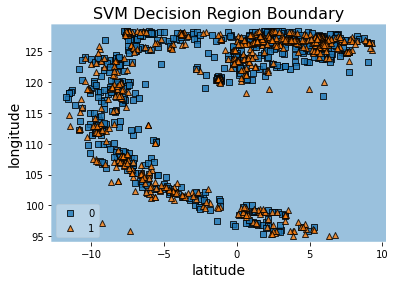

In [31]:
plot_decision_regions(X=np.array(x), 
                      y=np.array(y),
                      clf=cl, 
                      legend=3)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [29]:
cl.predict([[69,70]])

array([0])